## Data Prepare & Labeled

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
sample_df = pd.read_excel('dataset/sample_1000.xlsx')
sample_df['category'] = sample_df['情感倾向'].apply(lambda x: 2 if x == '其他' else 1 if x == 'P' else 0)

## word vectorizer

In [4]:
import jieba
import re

### baidu stopwords

In [5]:
stopwords = set(pd.read_table("stopwords/baidu_stopwords.txt",names = ["w"],sep = 'aaa',encoding = "utf-8",engine="python").w)

### jieba cut with trip \s+ to 1 \s

In [6]:
def jieba_cut(intxt):
    return [w for w in jieba.lcut(re.sub('\s+', ' ', intxt)) if w not in stopwords and len(w) > 1]

### jieba tokenize

In [7]:
txt_list = [str(row['title']) + " " + str(row['content']) for _, row in sample_df.iterrows()]
txt_after_cut_list = [jieba_cut(txt) for txt in txt_list]
target_series = sample_df['category']

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.488 seconds.
Prefix dict has been built successfully.


In [8]:
txt_after_cut_list

[['落日',
  '攻略',
  '三亚',
  '日落',
  '绝美',
  '地点',
  '美食',
  '落日',
  '攻略',
  '三亚',
  '日落',
  '绝美',
  '地点',
  '美食',
  '三亚',
  '日落',
  '地方',
  '很多',
  '落日',
  '顺路',
  '三亚湾',
  '夜景',
  '天涯海角',
  '日落',
  '天涯海角',
  '景区',
  '内有',
  '很多',
  '婚纱',
  '摄影',
  '布景',
  '布景',
  '配合',
  '落日',
  '特别',
  '好看',
  '包括',
  '小洞天',
  '落日',
  '拍美照',
  '景点',
  '下午',
  '18',
  '30',
  '关门',
  '蜈支洲岛',
  '日落',
  '蜈支洲岛',
  '岛上',
  '酒店',
  '一晚',
  '日出日落',
  '划算',
  '岛上',
  '酒店',
  '1000',
  '设施',
  '设备',
  '一般般',
  '比不上',
  '海棠',
  '同价位',
  '酒店',
  '蜈支洲岛',
  '东边',
  '日出',
  '西岛',
  '日落',
  '西岛',
  '岛上',
  '酒店',
  '岛上',
  '民宿',
  '很多',
  '民宿',
  '200',
  '500',
  '日落',
  '经济',
  '实惠',
  '傍晚',
  '赶海',
  '岛上',
  '不少',
  '民宿',
  '海边',
  '出门',
  '大海',
  '一场',
  '落日',
  '日出',
  '感觉',
  '椰梦',
  '长廊',
  '日落',
  '亚洲',
  '第一',
  '海滨',
  '风景',
  '大道',
  '热带植物',
  '园林',
  '景色',
  '美到',
  '随随便便',
  '张照',
  '电影',
  '定妆',
  '高大',
  '日落',
  '美食',
  '相配',
  '小海豚',
  '连锁',
  '海鲜',
  '门店',
  '热门',
  '商圈',
  '门店',
  '提供',
  '5km',
  '免

### TF-IDF Vectorizer

In [9]:
from gensim.models import TfidfModel
from gensim.corpora import Dictionary
import gensim

dict = Dictionary(txt_after_cut_list)
corpus = [dict.doc2bow(line) for line in txt_after_cut_list]
model = TfidfModel(corpus) 

### Topic vectorizer LSI

In [10]:
from gensim.models import LsiModel
import numpy as np
model = LsiModel(corpus, id2word=dict, num_topics=200)
vectorized_corpus = model[corpus]
vecs = np.array([ 
    gensim.matutils.sparse2full(vectorized_corpus[i], len(vectorized_corpus[0])) for i in range(len(vectorized_corpus))
])

In [12]:
data = pd.DataFrame(vecs)
data['target'] = target_series
data

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,target
0,8.635644,-23.540190,1.306027,0.867760,-0.354533,1.611097,-6.466259,4.870416,1.766121,0.074374,...,0.161419,0.052231,0.164544,0.121115,-0.170088,0.098368,0.126830,0.047398,-0.003437,1
1,0.378362,0.168278,0.097119,0.375632,-0.242374,-0.557067,0.586550,1.242612,-0.585743,-0.600226,...,-0.092524,-0.149238,-0.182519,-0.121344,-0.011513,0.011692,0.028007,0.119913,0.191467,1
2,2.655200,0.371929,-2.451323,-1.031929,1.258133,0.878020,-0.003916,0.049760,-0.684206,-0.308834,...,-0.637873,0.573545,-0.411260,-0.510438,0.280123,-0.747797,0.426068,-0.058732,-0.086131,1
3,0.735519,0.184371,0.097889,-0.091316,0.021447,-0.090263,0.265427,0.275185,0.023887,0.222615,...,0.028023,0.124542,-0.386803,-0.092338,0.099274,-0.114654,-0.021713,0.333291,-0.089876,2
4,8.216474,-19.839108,0.371159,0.395571,0.012921,1.599362,-4.982746,3.690722,1.184964,-0.401563,...,0.246439,0.163195,-0.342038,0.109811,0.581188,0.011236,0.011479,0.148141,0.265431,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2.877906,0.980170,-0.473577,-0.142355,0.174990,-0.664960,-0.580721,-0.504646,1.209481,0.999876,...,-0.397176,0.072613,-0.149698,0.564354,0.282606,-0.050373,-0.015032,-0.435899,0.345440,1
996,0.000782,0.000259,-0.001543,-0.001296,0.000612,-0.002059,0.000978,0.000977,0.001340,-0.000448,...,0.002826,-0.002166,0.002410,0.008466,-0.000008,0.001918,0.000802,-0.001097,0.002676,1
997,4.893276,1.050271,-4.162157,-2.091420,3.239795,1.504569,-0.115351,-0.493167,-1.114051,-0.089330,...,-1.000926,1.087171,-0.190527,-0.020700,0.289269,-0.778956,1.325970,0.090341,0.372957,1
998,1.643984,0.343634,-0.941679,-0.370227,0.576853,-1.373391,0.071566,0.334546,-0.521936,0.275752,...,-0.003099,-0.017404,0.215360,0.008391,0.067459,-0.880958,0.535754,1.159799,0.036238,1


## Pycaret For Classification

In [23]:
from pycaret.classification import *
clf1 = setup(data = data, target = 'target', session_id=123)

,Description,Value
0,session_id,123
1,Target,target
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(1000, 201)"
5,Missing Values,False
6,Numeric Features,200
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


### Compare Models

In [36]:
[best, _2, _3] = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9413,0.5728,0.5848,0.9172,0.9349,0.2511,0.2706,0.9820
et,Extra Trees Classifier,0.9413,0.5201,0.5659,0.9176,0.9335,0.1909,0.2300,0.1760
rf,Random Forest Classifier,0.9399,0.4865,0.5575,0.9164,0.9313,0.1672,0.2116,0.1890
qda,Quadratic Discriminant Analysis,0.9371,0.3507,0.5333,0.8944,0.9233,0.0000,0.0000,0.1150
dummy,Dummy Classifier,0.9371,0.3500,0.5333,0.8944,0.9233,0.0000,0.0000,0.0030
lightgbm,Light Gradient Boosting Machine,0.9370,0.5552,0.5570,0.9118,0.9288,0.1808,0.2093,0.3660
knn,K Neighbors Classifier,0.8312,0.5158,0.5654,0.9271,0.8734,0.2336,0.2620,0.1460


In [37]:
print(best)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


### Blend Models (Voting rule classifier)

In [38]:
blender = blend_models([best, _2, _3], method = 'hard', fold = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9429,0.0000,0.9848,0.9559,0.9701,0.3069,0.3272
1,0.9571,0.0000,1.0000,0.9565,0.9778,0.3860,0.4890
2,0.9429,0.0000,0.3333,0.8890,0.9151,0.0000,0.0000
3,0.9429,0.0000,0.3333,0.8890,0.9151,0.0000,0.0000
4,0.9571,0.0000,0.4444,0.9447,0.9433,0.3878,0.4899
5,0.9429,0.0000,0.4167,0.9319,0.9237,0.3187,0.4347
6,0.9286,0.0000,0.3333,0.8622,0.8942,0.0000,0.0000
7,0.9571,0.0000,0.5000,0.9447,0.9457,0.5551,0.6193
8,0.9143,0.0000,0.3282,0.8613,0.8870,-0.0219,-0.0299


In [41]:
for e in blender.estimators:
    print(e)

('gbc', GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False))
('et', ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
       

### Analyze Best Model

In [43]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

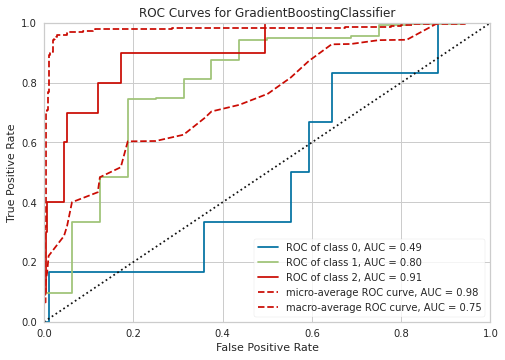

In [44]:
plot_model(best, plot = 'auc')

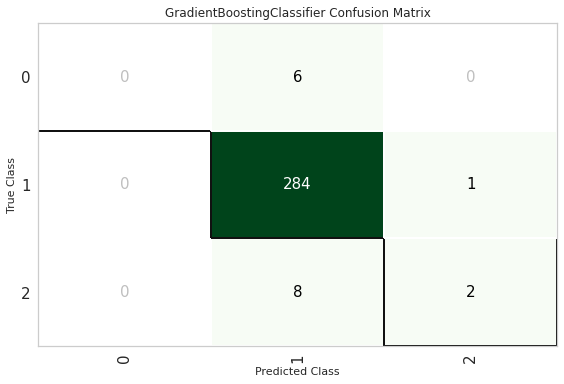

In [45]:
plot_model(best, plot = 'confusion_matrix')

### Predictions

In [46]:
predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9502,0,0.3988,0.9245,0.9327,0.1996,0.2770


,0,1,2,3,4,5,6,7,8,9,...,193,194,195,196,197,198,199,target,Label,Score
0,2.693688,0.776216,-0.458334,-1.298037,0.868039,-0.241412,-0.269166,-0.176471,0.369980,0.211552,...,-0.397242,0.213408,-0.072135,-0.475714,0.060010,0.338236,-0.665336,1,1,1.0000
1,2.126826,0.728028,-0.209459,0.239632,0.029500,-0.361051,-0.457666,-0.186759,-0.206267,0.364389,...,-0.251931,0.055456,0.472262,0.389201,0.223824,-0.261565,-0.072407,1,1,0.9994
2,3.758285,1.273101,-0.480555,0.680974,0.193066,0.616304,-0.627174,-0.509509,-0.299793,-0.132507,...,-0.284040,-0.303508,-0.208019,0.191760,0.209462,-0.483669,-0.080415,1,1,0.9999
3,1.380071,0.290273,-0.713152,-0.532524,0.490677,0.015401,0.178548,0.274190,-0.048560,-0.243385,...,-0.105563,-0.069760,0.357904,0.019183,-0.017797,-0.030566,-0.196058,1,1,0.9999
4,0.113706,-0.004222,-0.174632,-0.075981,0.146762,0.066139,0.109698,0.008045,-0.087900,-0.020927,...,-0.010100,-0.055856,0.021491,0.099212,-0.004050,-0.010131,-0.071671,1,1,0.9980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,1.159984,0.336177,-0.392625,-0.059632,0.201434,-1.575616,0.119409,0.371554,1.704883,0.728745,...,0.011581,0.700969,0.062399,-0.414056,0.224807,0.590175,0.188531,1,1,0.9994
297,3.753308,1.135428,-0.903429,-0.065128,0.657110,-0.189148,-0.083756,0.288820,0.317918,0.743968,...,-0.074183,0.583660,0.073202,-0.463260,-0.791739,0.939001,-0.462412,1,1,0.9996
298,4.595263,1.525807,-1.189726,2.111277,0.915338,-7.654476,-7.081220,-4.659746,-4.059644,1.846219,...,0.265266,0.308172,0.146676,0.504326,0.782281,-0.717732,0.999731,1,1,0.9989
299,1.719488,0.667797,0.410716,1.208869,-0.783582,-1.483762,1.976732,3.899882,-1.876909,-1.770113,...,0.083568,-0.006163,0.016365,-0.080631,-0.098427,-0.066880,0.312631,1,1,0.9997


In [47]:
predictions = predict_model(best, data=data)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9850,0.9556,0.7891,0.9850,0.9838,0.8532,0.8602


,0,1,2,3,4,5,6,7,8,9,...,193,194,195,196,197,198,199,target,Label,Score
0,8.635644,-23.540190,1.306027,0.867760,-0.354533,1.611097,-6.466259,4.870416,1.766121,0.074374,...,0.164544,0.121115,-0.170088,0.098368,0.126830,0.047398,-0.003437,1,1,0.9983
1,0.378362,0.168278,0.097119,0.375632,-0.242374,-0.557067,0.586550,1.242612,-0.585743,-0.600226,...,-0.182519,-0.121344,-0.011513,0.011692,0.028007,0.119913,0.191467,1,1,0.9997
2,2.655200,0.371929,-2.451323,-1.031929,1.258133,0.878020,-0.003916,0.049760,-0.684206,-0.308834,...,-0.411260,-0.510438,0.280123,-0.747797,0.426068,-0.058732,-0.086131,1,1,0.9975
3,0.735519,0.184371,0.097889,-0.091316,0.021447,-0.090263,0.265427,0.275185,0.023887,0.222615,...,-0.386803,-0.092338,0.099274,-0.114654,-0.021713,0.333291,-0.089876,2,2,0.9739
4,8.216474,-19.839108,0.371159,0.395571,0.012921,1.599362,-4.982746,3.690722,1.184964,-0.401563,...,-0.342038,0.109811,0.581188,0.011236,0.011479,0.148141,0.265431,1,1,0.9998


In [48]:
predictions = predict_model(best, data=data, raw_score=True)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9850,0.9556,0.7891,0.9850,0.9838,0.8532,0.8602


,0,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,target,Label,Score_0,Score_1,Score_2
0,8.635644,-23.540190,1.306027,0.867760,-0.354533,1.611097,-6.466259,4.870416,1.766121,0.074374,...,-0.170088,0.098368,0.126830,0.047398,-0.003437,1,1,0.0001,0.9983,0.0016
1,0.378362,0.168278,0.097119,0.375632,-0.242374,-0.557067,0.586550,1.242612,-0.585743,-0.600226,...,-0.011513,0.011692,0.028007,0.119913,0.191467,1,1,0.0000,0.9997,0.0003
2,2.655200,0.371929,-2.451323,-1.031929,1.258133,0.878020,-0.003916,0.049760,-0.684206,-0.308834,...,0.280123,-0.747797,0.426068,-0.058732,-0.086131,1,1,0.0001,0.9975,0.0024
3,0.735519,0.184371,0.097889,-0.091316,0.021447,-0.090263,0.265427,0.275185,0.023887,0.222615,...,0.099274,-0.114654,-0.021713,0.333291,-0.089876,2,2,0.0001,0.0260,0.9739
4,8.216474,-19.839108,0.371159,0.395571,0.012921,1.599362,-4.982746,3.690722,1.184964,-0.401563,...,0.581188,0.011236,0.011479,0.148141,0.265431,1,1,0.0000,0.9998,0.0002


### calibrate_model

In [53]:
calibrated_gbc = calibrate_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9429,0.0000,1.0000,0.9429,0.9706,0.0000,0.0000
1,0.9571,0.0000,1.0000,0.9565,0.9778,0.3860,0.4890
2,0.9429,0.8558,0.3333,0.8890,0.9151,0.0000,0.0000
3,0.9429,0.8891,0.3333,0.8890,0.9151,0.0000,0.0000
4,0.9571,0.7675,0.4444,0.9447,0.9433,0.3878,0.4899
5,0.9286,0.8501,0.3333,0.8622,0.8942,0.0000,0.0000
6,0.9286,0.7683,0.3333,0.8622,0.8942,0.0000,0.0000
7,0.9429,0.8910,0.4167,0.9319,0.9237,0.3187,0.4347
8,0.9143,0.5058,0.3282,0.8613,0.8870,-0.0219,-0.0299


In [56]:
print(calibrated_gbc)

CalibratedClassifierCV(base_estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                                 criterion='friedman_mse',
                                                                 init=None,
                                                                 learning_rate=0.1,
                                                                 loss='deviance',
                                                                 max_depth=3,
                                                                 max_features=None,
                                                                 max_leaf_nodes=None,
                                                                 min_impurity_decrease=0.0,
                                                                 min_impurity_split=None,
                                                                 min_samples_leaf=1,
                                                                 min_sam

#### Before calibration

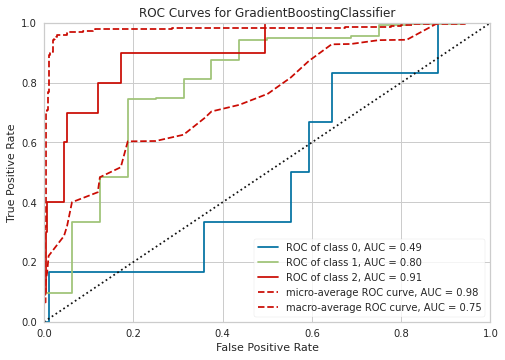

In [58]:
plot_model(best, plot = 'auc')

### After calibrate

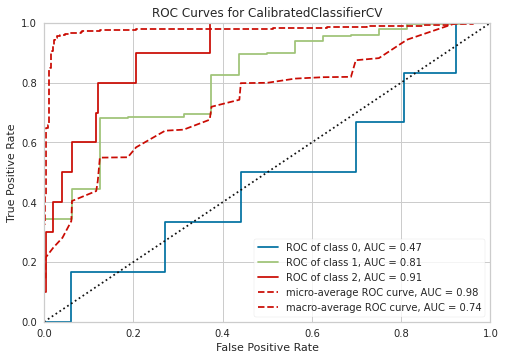

In [59]:
plot_model(calibrated_gbc, plot = 'auc')